
##  M.Khubaib Arif 


# The gender is categorized into 0s and 1s. 0 indicate male and 1 represent female. We are trying to use the data and train our program to guess the gender based on features like math score, reading score and writing score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#from sklearn import datasets
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix
#%reload_ext memory_profiler

In [2]:
exams_data=pd.read_csv('exams.csv')

In [3]:
exams_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
exams_data=exams_data.drop('race/ethnicity', axis=1)
exams_data=exams_data.drop('parental level of education', axis=1)
exams_data=exams_data.drop('lunch', axis=1)
exams_data=exams_data.drop('test preparation course', axis=1)

In [5]:
exams_data.gender.replace('male', 0, inplace=True)
exams_data.gender.replace('female', 1, inplace=True)

In [6]:
exams_data

,gender,math score,reading score,writing score
0,0,67,67,63
1,1,40,59,55
2,0,59,60,50
3,0,77,78,68
4,0,78,73,68
...,...,...,...,...
995,0,73,70,65
996,0,85,91,92
997,1,32,35,41
998,1,73,74,82


In [7]:
exams_data.columns

Index(['gender', 'math score', 'reading score', 'writing score'], dtype='object')

In [8]:
study_variables=exams_data[['math score', 'reading score', 'writing score']] #Standardize the data
scaler=StandardScaler()
scaler.fit(study_variables)
study_variables=scaler.transform(study_variables)
study_variables=pd.DataFrame(study_variables, columns=['math score', 'reading score', 'writing score'])
ivs=study_variables[['math score', 'reading score', 'writing score']].reset_index(drop=True)
dv=exams_data.gender.reset_index(drop=True)

In [9]:
kf=KFold(n_splits=5) #K Fold Split
for train_index, test_index, in kf.split(ivs, dv):
    ivs_train, ivs_test, dv_train, dv_test=ivs.iloc[train_index], ivs.iloc[test_index], dv.iloc[train_index], dv.iloc[test_index]
    
print('mobile_data shape is: ', exams_data.shape)
print('ivs_train shape is: ',ivs_train.shape)
print('ivs_test shape is: ',ivs_test.shape)
print('dv_train shape is: ',dv_train.shape)
print('dv_test shape is: ',dv_test.shape)

mobile_data shape is:  (1000, 4)
ivs_train shape is:  (800, 3)
ivs_test shape is:  (200, 3)
dv_train shape is:  (800,)
dv_test shape is:  (200,)


In [24]:
accuracy_score_list = []

def classfication_evaluation(prediction, dv_test):
    
    
    actual_predicted = pd.DataFrame(data= [prediction, dv_test], index = ['predicted_value', 'actual_value']).transpose()
    cm = metrics.confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value)
    accuracy_score = metrics.accuracy_score(actual_predicted.actual_value, actual_predicted.predicted_value)
    print('\n accuracy score \t\t', accuracy_score)
    accuracy_score_list.append(accuracy_score)
    print('\n confusion matrix', cm, sep = '\n\n')
    print('\n\n', metrics.classification_report(actual_predicted.actual_value, actual_predicted.predicted_value))
    
    tp, fn, fp, tn = confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value).ravel()
    print('Number of true positives are :',tp)
    print('Number of false negatives are :',fn)
    print('Number of false positives are :',fp)
    print('Number of true negatives are :',tn)
    
    
    
    sns.heatmap(cm, annot=True, square=True, annot_kws = {'wrap': False ,'size': 15, 'rotation': 45},
            fmt='g',
            xticklabels=['manual', 'automatic'],
            yticklabels=['manual', 'automatic'],
            robust = True,
            cmap="YlGnBu",
            linewidths=5, linecolor='grey',
            cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', fontdict={'fontsize': 15}, pad = 15)

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc_list = []
fpr_list =[]
tpr_list = []
model_list=[]

def get_roc(dv_test, prediction, model):
    model_fpr, model_tpr, threshold = roc_curve(dv_test, prediction)
    auc_model = auc(model_fpr, model_tpr)
    auc_list.append(auc_model)
    fpr_list.append(model_fpr)
    tpr_list.append(model_tpr)
    model_list.append(model())
    print()
    print(f'AUC of {model()} is: ', auc_model)
    plt.figure(figsize=[2.5,2.5], dpi=200)
    plt.plot(model_fpr, model_tpr, linestyle = '-.', marker = '.', label = f'{model()} (auc=%0.3f)' %auc_model)
    plt.xlabel('False Positive Rate -->',fontsize=7 )
    plt.ylabel('True Positive Rate -->',fontsize=7)
    plt.legend(loc = 'lower right', fontsize=4.5)
    plt.show()

## Logestic Regression

In [12]:
reg= LogisticRegression()
reg= reg.fit(ivs_train, dv_train)
prediction=reg.predict(ivs_test)

In [13]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
reg.predict_proba(ivs_test)

array([[0.48093708, 0.51906292],
       [0.00859132, 0.99140868],
       [0.00654335, 0.99345665],
       [0.89444356, 0.10555644],
       [0.97585255, 0.02414745],
       [0.640664  , 0.359336  ],
       [0.03507292, 0.96492708],
       [0.3232619 , 0.6767381 ],
       [0.00621334, 0.99378666],
       [0.48112839, 0.51887161],
       [0.91509058, 0.08490942],
       [0.52437364, 0.47562636],
       [0.77472673, 0.22527327],
       [0.93718797, 0.06281203],
       [0.68047758, 0.31952242],
       [0.03629516, 0.96370484],
       [0.21160431, 0.78839569],
       [0.80726858, 0.19273142],
       [0.01632268, 0.98367732],
       [0.03371428, 0.96628572],
       [0.63318481, 0.36681519],
       [0.72116281, 0.27883719],
       [0.22243128, 0.77756872],
       [0.87135964, 0.12864036],
       [0.92037334, 0.07962666],
       [0.56789568, 0.43210432],
       [0.01923112, 0.98076888],
       [0.10742564, 0.89257436],
       [0.96730581, 0.03269419],
       [0.62820558, 0.37179442],
       [0.


 accuracy score 		 0.865

 confusion matrix

[[99 11]
 [16 74]]


               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.87      0.82      0.85        90

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

Number of true positives are : 99
Number of false negatives are : 11
Number of false positives are : 16
Number of true negatives are : 74


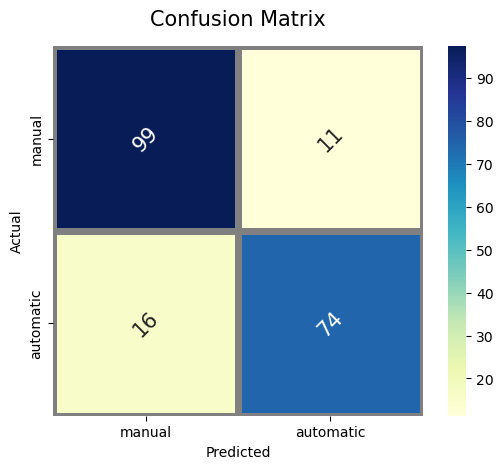

In [15]:
classfication_evaluation(prediction, dv_test)


AUC of LogisticRegression() is:  0.861111111111111


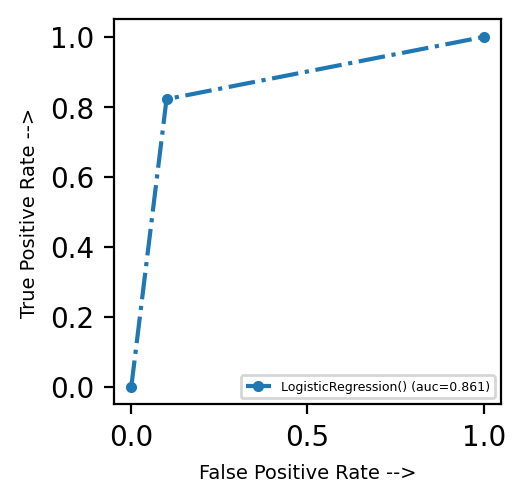

In [16]:
get_roc(dv_test, prediction, LogisticRegression)

## Decision Tree

In [17]:
dtc= DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(ivs_train, dv_train)
prediction=dtc.predict(ivs_test)

In [18]:
text_representation=tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 0.95
|   |--- feature_0 <= 0.40
|   |   |--- feature_2 <= -0.14
|   |   |   |--- feature_0 <= -0.25
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.25
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.14
|   |   |   |--- feature_0 <= -0.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.06
|   |   |   |   |--- class: 1
|   |--- feature_0 >  0.40
|   |   |--- feature_2 <= 0.63
|   |   |   |--- feature_2 <= 0.18
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.18
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  0.63
|   |   |   |--- feature_0 <= 0.85
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.85
|   |   |   |   |--- class: 0
|--- feature_2 >  0.95
|   |--- feature_0 <= 1.24
|   |   |--- feature_0 <= 0.46
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.46
|   |   |   |--- feature_2 <= 1.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  1.20
|   |   |   |   |--- class: 1
|   |


 accuracy score 		 0.685

 confusion matrix

[[88 22]
 [41 49]]


               precision    recall  f1-score   support

           0       0.68      0.80      0.74       110
           1       0.69      0.54      0.61        90

    accuracy                           0.69       200
   macro avg       0.69      0.67      0.67       200
weighted avg       0.69      0.69      0.68       200

Number of true positives are : 88
Number of false negatives are : 22
Number of false positives are : 41
Number of true negatives are : 49


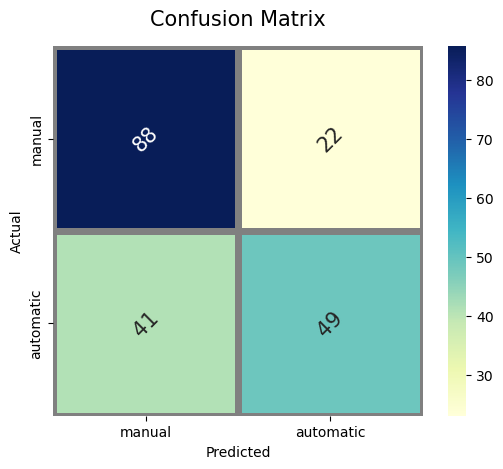

In [19]:
classfication_evaluation(prediction, dv_test)


AUC of DecisionTreeClassifier() is:  0.6722222222222222


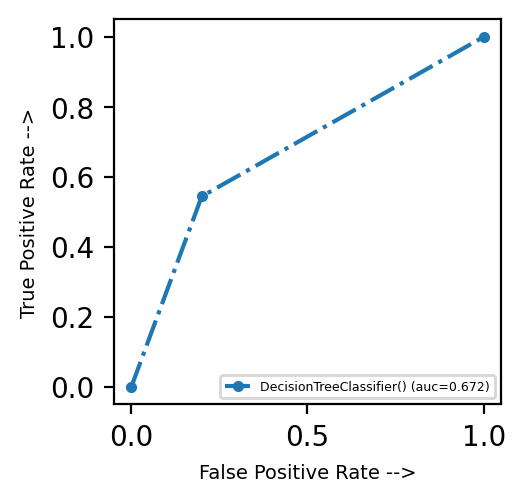

In [20]:
get_roc(dv_test, prediction, DecisionTreeClassifier)

## Random Forest

In [21]:
rfc= RandomForestClassifier(n_estimators=10)
rfc.fit(ivs_train, dv_train)
prediction=rfc.predict(ivs_test)


 accuracy score 		 0.805

 confusion matrix

[[95 15]
 [24 66]]


               precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.81      0.73      0.77        90

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

Number of true positives are : 95
Number of false negatives are : 15
Number of false positives are : 24
Number of true negatives are : 66


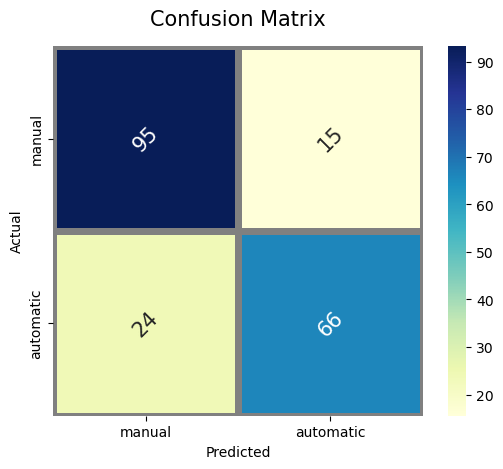

In [22]:
classfication_evaluation(prediction, dv_test)


AUC of RandomForestClassifier() is:  0.7984848484848486


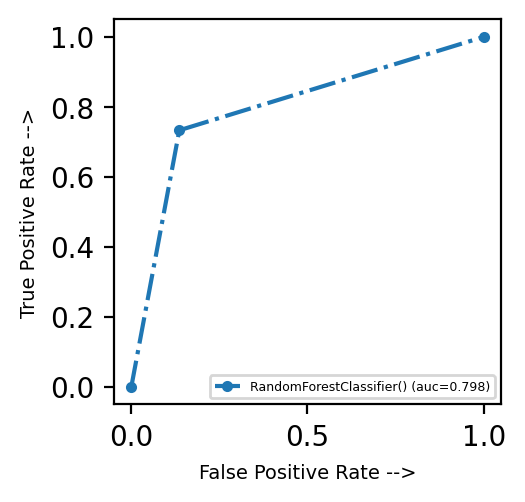

In [23]:
get_roc(dv_test, prediction, RandomForestClassifier)

# From classification algorithms we have used, Logestic regression has shown best results. It has highest AUC and accuracy score. So, we would suggest to select Logestic regression for this project. 